# Creating 3 images with a moving circle

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

### Create three images
With a circle of diameter 10 that moves from coordinate (30, 20), (30, 21), and (30, 22). (row, column)

In [2]:
%%bash
/home/vruiz/repos/image_synthesis/moving_circle.sh -w 64 -h 64 -x 20 -y 30 -d 10 -f 3
mv /tmp/moving_circle_000.png .
mv /tmp/moving_circle_001.png .
mv /tmp/moving_circle_002.png .

/home/vruiz/repos/image_synthesis/moving_circle.sh: parsing: -w 64 -h 64 -x 20 -y 30 -d 10 -f 3
image_width = 64
image_height = 64
Initial X coordinate = 20
Initial Y coordinate = 30
diameter = 10
frames = 3


+ i=0
+ '[' 0 -le 2 ']'
++ printf %03d 0
+ ii=000
+ convert -size 64x64 xc:skyblue -fill white -stroke black -draw 'circle 20,30 30,30' -depth 8 /tmp/moving_circle_000.png
+ i=1
+ '[' 1 -le 2 ']'
++ printf %03d 1
+ ii=001
+ convert -size 64x64 xc:skyblue -fill white -stroke black -draw 'circle 21,30 31,30' -depth 8 /tmp/moving_circle_001.png
+ i=2
+ '[' 2 -le 2 ']'
++ printf %03d 2
+ ii=002
+ convert -size 64x64 xc:skyblue -fill white -stroke black -draw 'circle 22,30 32,30' -depth 8 /tmp/moving_circle_002.png
+ i=3
+ '[' 3 -le 2 ']'


### Displaying stuff

In [3]:
def normalize(img):
    max_component = np.max(img)
    min_component = np.min(img)
    max_min_component = max_component - min_component
    return (img-min_component)/max_min_component

def show_img(prefix):
    img = load_img(prefix)
    img = normalize(img)
    plt.figure(figsize=(10,10))
    plt.title(prefix, fontsize=20)
    plt.imshow(img)
    
def load_frame(prefix):
    fn = f"{prefix}.png"
    print(fn)
    frame = cv2.imread(fn, cv2.IMREAD_UNCHANGED) # [rows, columns, components]
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print(frame.max())
    frame = np.array(frame)
    frame = frame.astype(np.float32) - 32768.0
    return frame

def write_frame(frame, prefix):
    frame = frame.astype(np.float32)
    frame += 32768.0
    frame = frame.astype(np.uint16)
    cv2.imwrite(f"{prefix}.png", frame)

def show_seq(prefix="/tmp/", frames=5):
    for i in range(frames):
        show_img(f"{prefix}{i:03d}")

def show_motion(prefix="/tmp/", frames=5):
    plt.figure(figsize=(10,10))
    prev = load_frame(f"{prefix}000")
    imgplot = plt.imshow(normalize(prev))
    for i in range(1, frames, 1):
        img = load_frame(f"{prefix}{i:03d}")
        diff = img - prev
        prev = img
        diff = normalize(diff)
        plt.figure(figsize=(10,10))
        plt.title(f"{prefix}{i:03d}", fontsize=20)
        plt.imshow(diff)

### Show the sequence

moving_circle_000.png
255
moving_circle_001.png
255
moving_circle_002.png
255


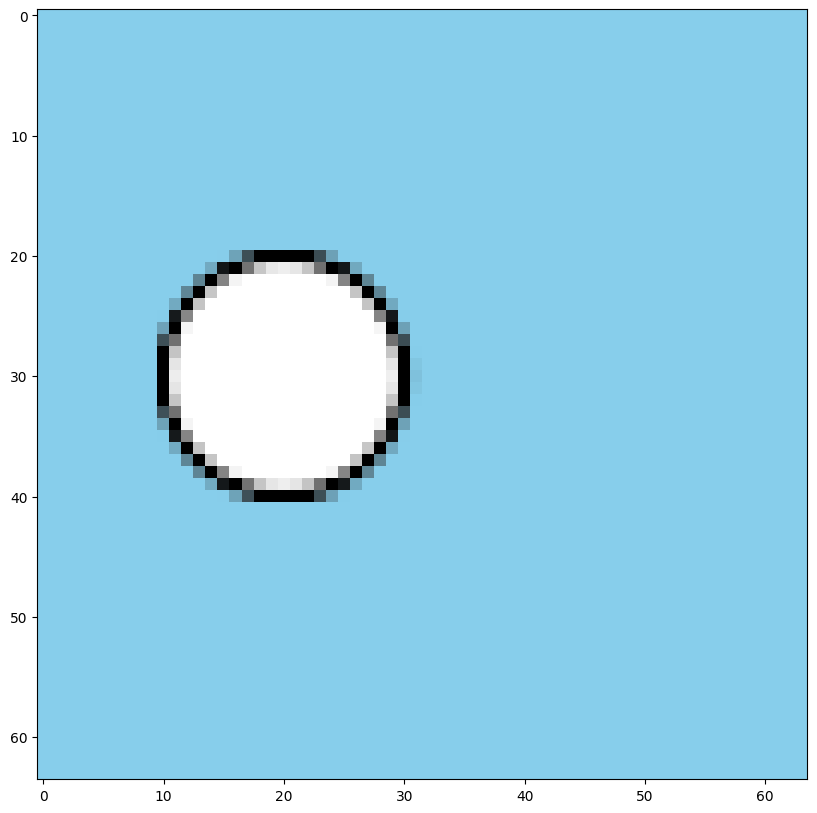

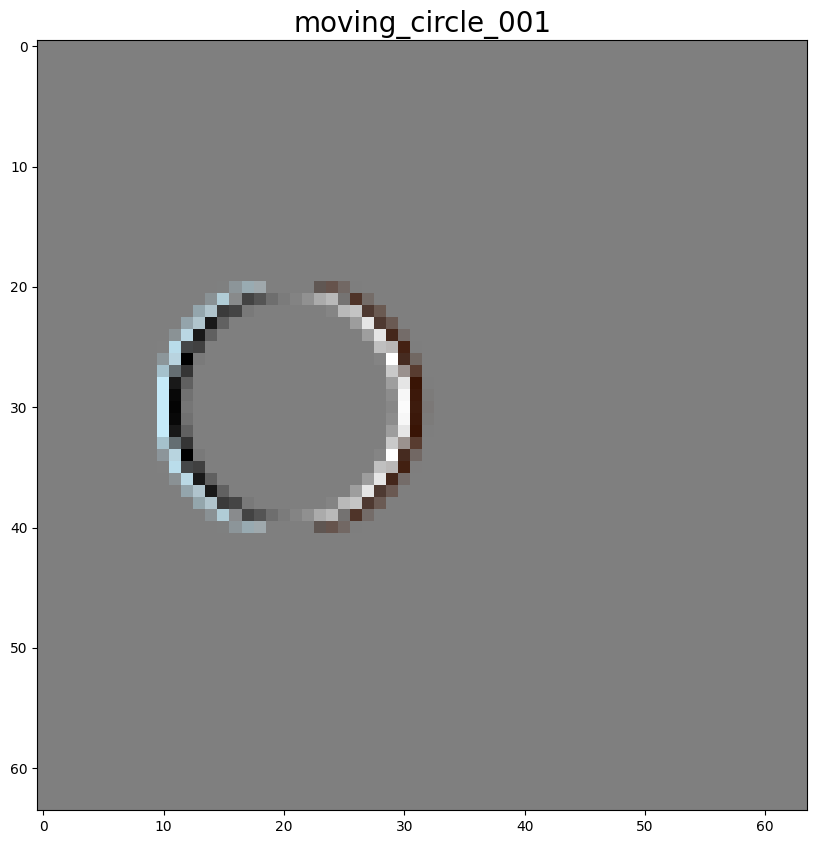

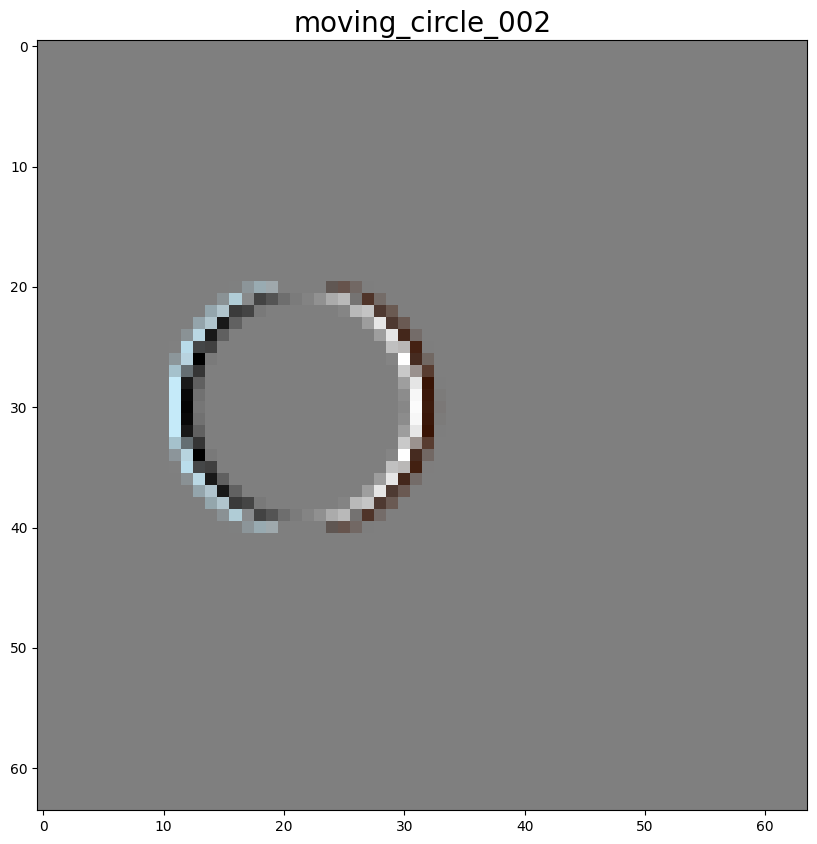

In [4]:
prefix = "moving_circle_"
show_motion(prefix, frames=3)

### Color transform stuff

In [5]:
def RGB_to_YCoCg(RGB_frame):
    R, G, B = RGB_frame[:,:,0], RGB_frame[:,:,1], RGB_frame[:,:,2]
    YCoCg_frame = np.empty_like(RGB_frame)
    YCoCg_frame[:,:,0] =  R/4 + G/2 + B/4 
    YCoCg_frame[:,:,1] =  R/2       - B/2
    YCoCg_frame[:,:,2] = -R/4 + G/2 - B/4
    return YCoCg_frame

### Load the images

In [6]:
frame_0 = load_frame(prefix + "000")
frame_1 = load_frame(prefix + "001")
frame_2 = load_frame(prefix + "002")
write_frame(frame_1-frame_0, "difference_0")
write_frame(frame_2-frame_0, "difference_1")

moving_circle_000.png
255
moving_circle_001.png
255
moving_circle_002.png
255


### Work only with luma

In [7]:
frame_0_Y = RGB_to_YCoCg(frame_0)[:,:,0]
frame_1_Y = RGB_to_YCoCg(frame_1)[:,:,0]
frame_2_Y = RGB_to_YCoCg(frame_2)[:,:,0]

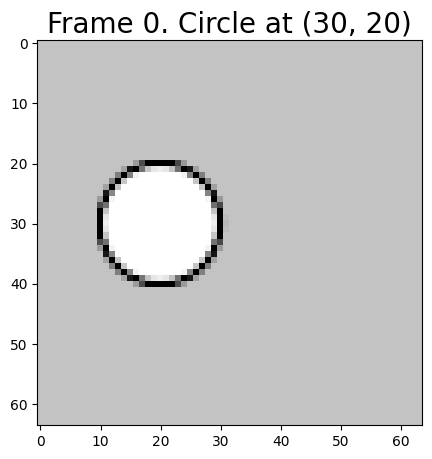

In [8]:
plt.figure(figsize=(5,5))
plt.title("Frame 0. Circle at (30, 20)", fontsize=20)
plt.imshow(frame_0_Y, cmap='gray')
plt.savefig("frame_0_Y.png")
plt.show()

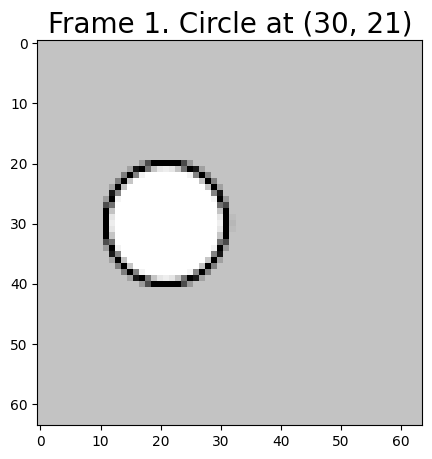

In [9]:
plt.figure(figsize=(5,5))
plt.title("Frame 1. Circle at (30, 21)", fontsize=20)
plt.imshow(frame_1_Y, cmap='gray')
plt.savefig("frame_1_Y.png")
plt.show()

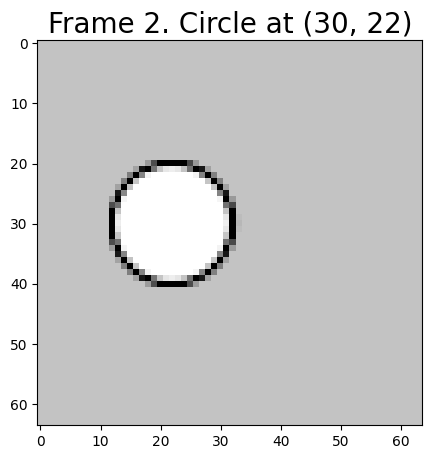

In [10]:
plt.figure(figsize=(5,5))
plt.title("Frame 2. Circle at (30, 22)", fontsize=20)
plt.imshow(frame_2_Y, cmap='gray')
plt.savefig("frame_2_Y.png")
plt.show()